In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/datasets/swatisingh1103/california-electricity-cost/california_electricity_cost_dataset.csv")
df.head()

,area_type,distance_to_power_line_m,terrain_type,connection_type,slope_level,wildfire_risk,road_access,house_size_sqft,estimated_peak_load_kw,estimated_cost_usd
0,urban,169.67,mountain,overhead,moderate,low,paved,2394.0,24.08,29712.67
1,rural,1053.78,mountain,underground,moderate,high,unpaved,4500.0,3.74,300652.52
2,urban,826.69,mountain,overhead,flat,low,unpaved,808.0,15.76,44878.56
3,urban,1964.93,forest,underground,flat,high,paved,4830.0,6.66,285969.04
4,rural,232.96,desert,underground,steep,high,difficult,3588.0,18.67,83865.36


In [4]:
print(df.shape)

(1000, 10)


In [5]:
print(df.isnull().sum())

area_type                   0
distance_to_power_line_m    0
terrain_type                0
connection_type             0
slope_level                 0
wildfire_risk               0
road_access                 0
house_size_sqft             0
estimated_peak_load_kw      0
estimated_cost_usd          0
dtype: int64


In [6]:
cd = ['area_type', 'terrain_type', 'connection_type', 'slope_level', 'wildfire_risk', 'road_access']

In [7]:
for col in cd:
    df[col] = df[col].astype('category')

In [8]:
X = df.drop("estimated_cost_usd", axis=1)
y = df["estimated_cost_usd"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# model = XGBRegressor(
#     n_estimators=800,  
#     learning_rate=0.05,
#     max_depth=6,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# model.fit(X_train, y_train)

# Initialize XGBRegressor

model = XGBRegressor(
    n_estimators=20,
    max_depth=6,
    learning_rate=0.1,
    tree_method="hist",
    enable_categorical=True,
    objective='reg:squarederror'
)

try:
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_pred = model.predict(X_test)
except Exception as e:
    print(f"Error : {e}")

In [12]:
y_pred = model.predict(X_test)

In [13]:
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print("MAE:", mae)
# print("RMSE:", rmse)
# print("R2 Score:", r2)


# r2 and rmse Metrics
try:
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
except Exception as e:
    print(f"An error occurred while calculating metrics: {e}")

MAE: 17421.34
RMSE: 870955011.83
R2 Score: 0.93


In [14]:
train_pred = model.predict(X_train)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, y_pred))

Train R2: 0.9631490016564019
Test R2: 0.9277978210696114


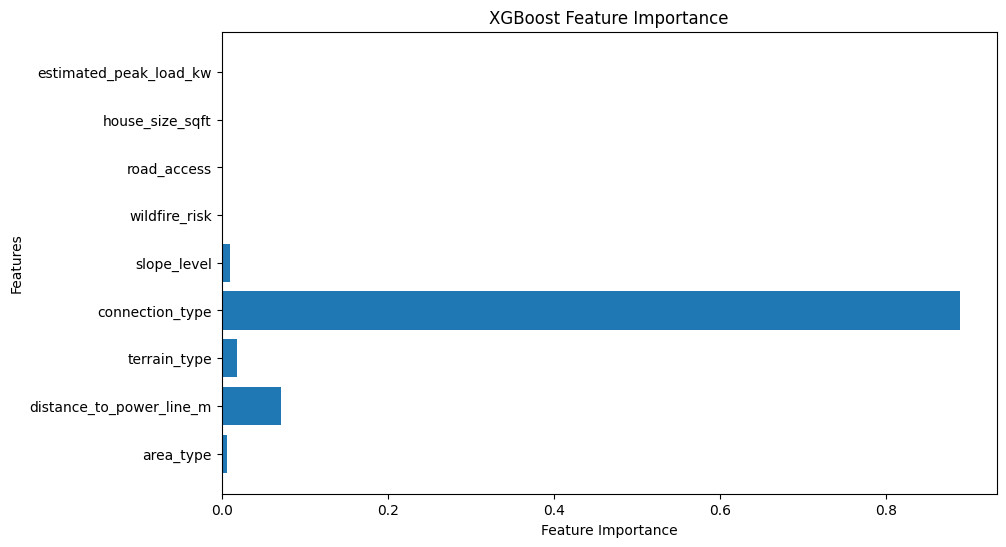

In [15]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

In [16]:
sample = X_test.iloc[0:1]
predicted_cost = model.predict(sample)

print("Predicted Electricity Cost:", predicted_cost[0])

Predicted Electricity Cost: 68668.74


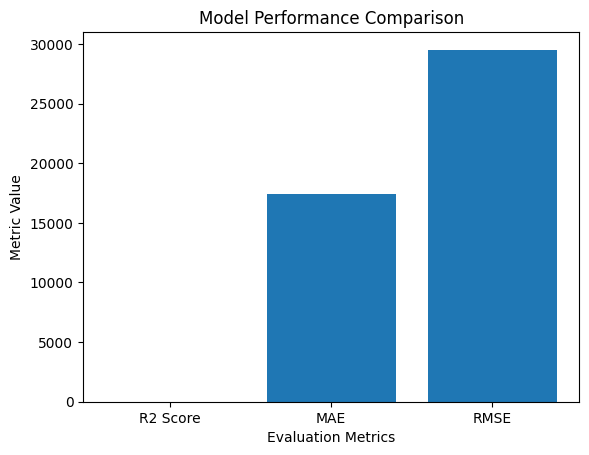

R2 Score: 0.9277978210696114
MAE: 17421.335992187498
RMSE: 29511.94693397609


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Store in list
metrics = ["R2 Score", "MAE", "RMSE"]
values = [r2, mae, rmse]

# Plot
plt.figure()
plt.bar(metrics, values)
plt.xlabel("Evaluation Metrics")
plt.ylabel("Metric Value")
plt.title("Model Performance Comparison")
plt.show()

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Average CV R2:", scores.mean())

Average CV R2: 0.9360784152693027


In [19]:
import pickle

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved : {model_filename}")

Model saved : xgboost_model.pkl
